In [1]:
import trajectory as traj
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
def plot_traj(trajs,element="pos",step = 0.01):
    time = []
    element_x = []
    element_y = []
    
    for i in range(len(trajs)):
        duration = trajs[i].get_poly()[0]
        #print(duration)
        t = np.linspace(0, duration, int(duration/step)+1)
        #print(t)
        ele_x = []
        ele_y = []
        for j in t:
            if element == "pos":
                term = traj.test_traj(trajs[i],j)[0]
                term2 = traj.test_traj(trajs[i],j)[1]
            elif element == "vel":
                term = traj.test_traj(trajs[i],j)[3]
                term2 = traj.test_traj(trajs[i],j)[4]
            elif element == "acc":
                term = traj.test_traj(trajs[i],j)[6]
                term2 = traj.test_traj(trajs[i],j)[7]
            
            ele_x.append(term)
            ele_y.append(term2)
            
        time.append(t)
        element_x.append(ele_x)
        element_y.append(ele_y)
    
    total_time = 0
    for i in time:
        total_time += len(i)
    time_draw = np.linspace(0,(total_time-1)*step,total_time)
    
    ele_x_draw = []
    for i in element_x:
        for j in i:
            ele_x_draw.append(j)
            
    ele_y_draw = []
    for i in element_y:
        for j in i:
            ele_y_draw.append(j)
    
    return time_draw, ele_x_draw, ele_y_draw

In [3]:
def plot_real_data(time,data_x,data_y,step = 0.01):
    total_time = 0
    
    for i in time:
        total_time += len(i)
    time_draw = np.linspace(0,(total_time-1)*step,total_time)
    
    data_x_draw = []
    for i in data_x:
        for j in i:
            data_x_draw.append(j)
            
    data_y_draw = []
    for i in data_y:
        for j in i:
            data_y_draw.append(j)    
    
    return time_draw, data_x_draw, data_y_draw

In [4]:
input_name = "./trajectory/SinglePointRobot2D_500.txt"
raw_data = traj.read_file(input_name)
multi_raw_trajs = traj.multi_traj_process(raw_data)

trajs = []

for traj_single in multi_raw_trajs:
    t,origin,x,y,z,vx,vy,vz = traj.traj_get_xyz(traj_single,40)
    trajs.append(traj.traj_generator(t,x,y,z,vx,vy,vz))

t,origin,x,y,z,vx,vy,vz = traj.traj_get_xyz(multi_raw_trajs[0],40)

step = t[0][1]-t[0][0]

real_time_1,real_x,real_y = plot_real_data(t,x,y,step)
real_time_2,real_vx,real_vy = plot_real_data(t,vx,vy,step)
time_draw_3, poly_x , poly_y = plot_traj(trajs[0],"pos",step)
time_draw_4, poly_vx , poly_vy = plot_traj(trajs[0],"vel",step)
time_draw_5, poly_ax , poly_ay = plot_traj(trajs[0],"acc",step)

the origin (x,y,z) = (-13.500,-7.200,2.000)
the origin (x,y,z) = (-13.500,-7.200,2.000)


In [5]:
len(real_time_1)

491

In [6]:
len(time_draw_3)

491

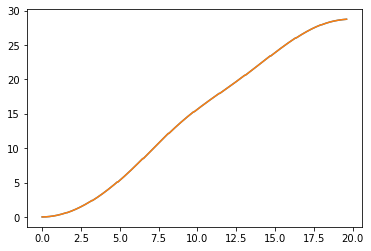

In [7]:
fig = plt.figure()
plt.plot(real_time_1,real_x)
plt.plot(time_draw_3,poly_x)
plt.show()  

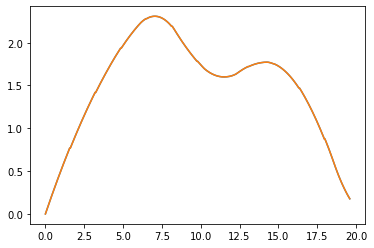

In [8]:
fig = plt.figure()
plt.plot(real_time_1,real_vx)
plt.plot(time_draw_4,poly_vx)
plt.show() 